In [1]:
import bt

In [2]:
# fetch some data
data = bt.get('spy,agg', start='2010-01-01')
print data.head()

                  spy        agg
Date                            
2010-01-04  98.214371  84.963075
2010-01-05  98.474354  85.349609
2010-01-06  98.543685  85.300266
2010-01-07  98.959667  85.201575
2010-01-08  99.288981  85.250923


In [3]:
# create the strategy
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

In [4]:
# create a backtest and run it
test = bt.Backtest(s, data)
res = bt.run(test)

s1
0%                          100%
[############################# ] | ETA: 00:00:00

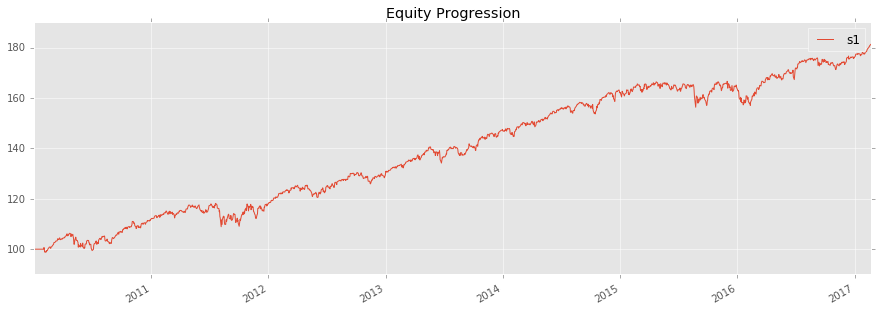

In [5]:
# first let's see an equity curve
res.plot()

In [6]:
# ok and what about some stats?
res.display()

Stat                 s1
-------------------  ----------
Start                2010-01-03
End                  2017-02-22
Risk-free rate       0.00%

Total Return         81.30%
Daily Sharpe         1.19
Daily Sortino        1.57
CAGR                 8.69%
Max Drawdown         -7.83%
Calmar Ratio         1.11

MTD                  2.08%
3m                   4.08%
6m                   3.26%
YTD                  3.11%
1Y                   12.04%
3Y (ann.)            6.82%
5Y (ann.)            8.12%
10Y (ann.)           8.69%
Since Incep. (ann.)  8.69%

Daily Sharpe         1.19
Daily Sortino        1.57
Daily Mean (ann.)    8.61%
Daily Vol (ann.)     7.23%
Daily Skew           -0.35
Daily Kurt           3.80
Best Day             2.48%
Worst Day            -3.11%

Monthly Sharpe       1.41
Monthly Sortino      2.61
Monthly Mean (ann.)  8.61%
Monthly Vol (ann.)   6.10%
Monthly Skew         0.01
Monthly Kurt         0.18
Best Month           5.69%
Worst Month          -3.39%

Yearly Sharpe   

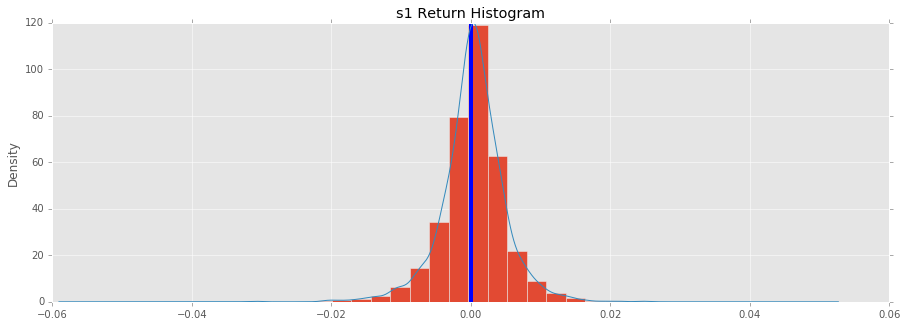

In [7]:
# ok and how does the return distribution look like?
res.plot_histogram()

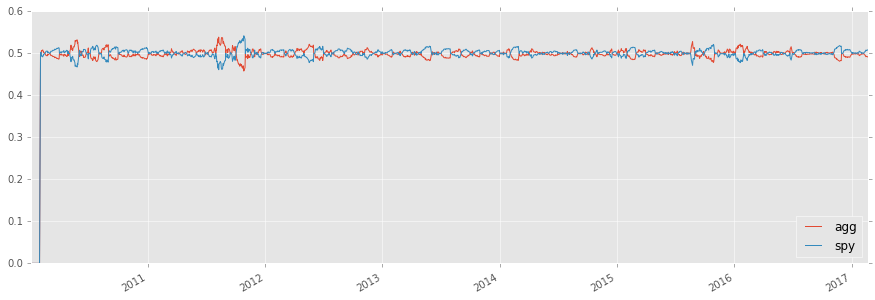

In [8]:
# and just to make sure everything went along as planned, let's plot the security weights over time
res.plot_security_weights()

s2
0%                          100%
[############################# ] | ETA: 00:00:00

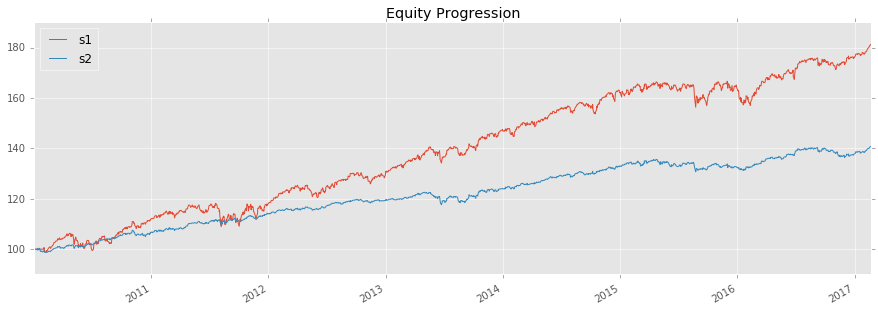

In [9]:
# create our new strategy
s2 = bt.Strategy('s2', [bt.algos.RunWeekly(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighInvVol(),
                        bt.algos.Rebalance()])

# now let's test it with the same data set. We will also compare it with our first backtest.
test2 = bt.Backtest(s2, data)
# we include test here to see the results side-by-side
res2 = bt.run(test, test2)

res2.plot()

In [10]:
res2.display()

Stat                 s1          s2
-------------------  ----------  ----------
Start                2010-01-03  2010-01-03
End                  2017-02-22  2017-02-22
Risk-free rate       0.00%       0.00%

Total Return         81.30%      40.79%
Daily Sharpe         1.19        1.45
Daily Sortino        1.57        2.00
CAGR                 8.69%       4.91%
Max Drawdown         -7.83%      -4.07%
Calmar Ratio         1.11        1.21

MTD                  2.08%       1.56%
3m                   4.08%       2.66%
6m                   3.26%       0.47%
YTD                  3.11%       2.27%
1Y                   12.04%      5.49%
3Y (ann.)            6.82%       3.97%
5Y (ann.)            8.12%       4.02%
10Y (ann.)           8.69%       4.91%
Since Incep. (ann.)  8.69%       4.91%

Daily Sharpe         1.19        1.45
Daily Sortino        1.57        2.00
Daily Mean (ann.)    8.61%       4.85%
Daily Vol (ann.)     7.23%       3.34%
Daily Skew           -0.35       -0.29
Daily Kurt   